<a href="https://colab.research.google.com/github/WagnerMiron/introducao_a_ciencia_de_dados/blob/main/T%C3%B3picos_Especiais_em_Projetos_4_Atividade_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

Conjunto de dados sintéticos com escalas desiguais

In [3]:
X, y = make_classification(n_samples=150, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X[:, 0] = X[:, 0] * 1000

Visualização dos dados antes da padronização

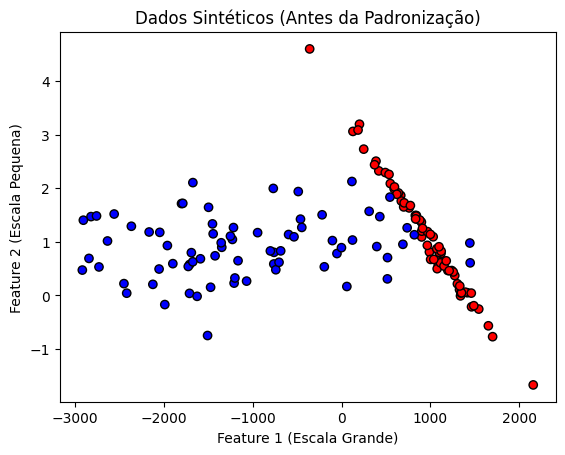

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1 (Escala Grande)')
plt.ylabel('Feature 2 (Escala Pequena)')
plt.title('Dados Sintéticos (Antes da Padronização)')
plt.show()

Padronização dos dados

In [5]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

Visualização dos dados após a padronização

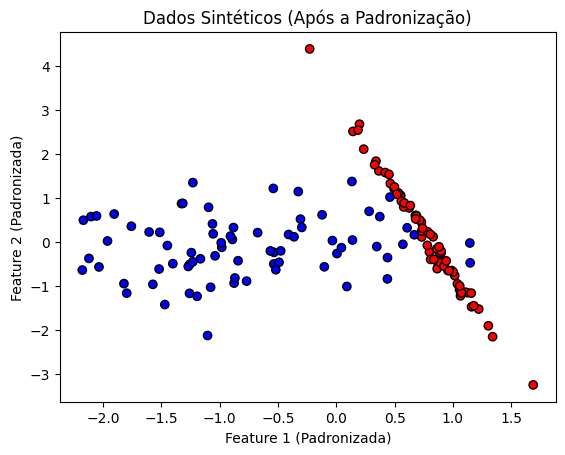

In [6]:
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1 (Padronizada)')
plt.ylabel('Feature 2 (Padronizada)')
plt.title('Dados Sintéticos (Após a Padronização)')
plt.show()

Divisão dos dados em treino, teste e treinamento do modelo nos conjuntos com e sem padronização

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standardized, y, test_size=0.5, random_state=35)

# Sem padronização
model = LogisticRegression()
model.fit(X_train, y_train)

# Com padronização
model_std = LogisticRegression()
model_std.fit(X_train_std, y_train_std)


LogisticRegression()

Matrizes de confusão

In [8]:
# Sem padronização
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Com padronização
y_pred_std = model_std.predict(X_test_std)
cm_std = confusion_matrix(y_test_std, y_pred_std)

# Impressão das matrizes de confusão
print("Matriz de Confusão sem Padronização:")
print(cm)
print("\nMatriz de Confusão com Padronização:")
print(cm_std)

Matriz de Confusão sem Padronização:
[[20  2]
 [ 0 23]]

Matriz de Confusão com Padronização:
[[31  6]
 [ 0 38]]


Curva ROC e AUC

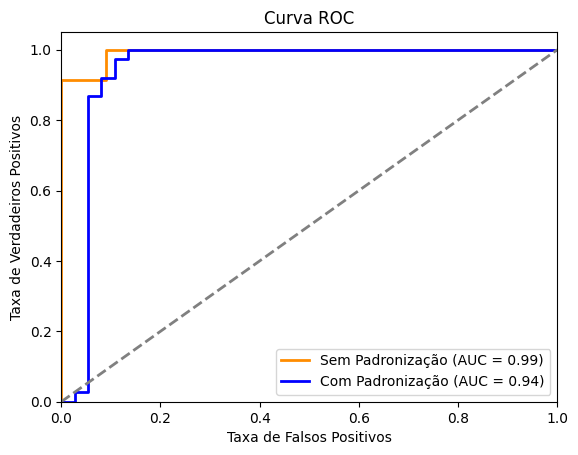

In [9]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
fpr_std, tpr_std, _ = roc_curve(y_test_std, model_std.predict_proba(X_test_std)[:, 1])
roc_auc_std = auc(fpr_std, tpr_std)

# Plot da Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Sem Padronização (AUC = {roc_auc:.2f})')
plt.plot(fpr_std, tpr_std, color='blue', lw=2, label=f'Com Padronização (AUC = {roc_auc_std:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Erro em função do k

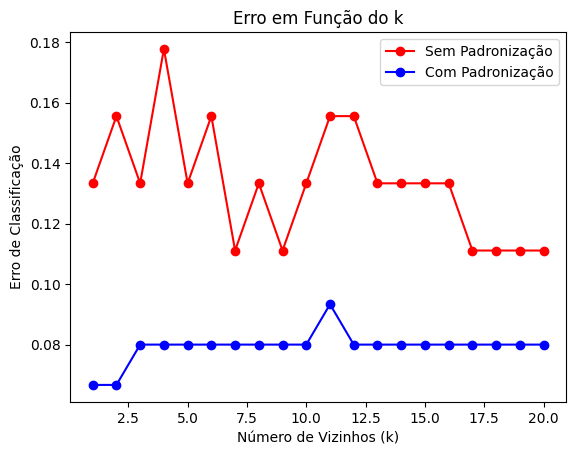

In [10]:
k_values = range(1, 21)
errors_no_std = []
errors_std = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Sem padronização
    knn.fit(X_train, y_train)
    errors_no_std.append(np.mean(knn.predict(X_test) != y_test))

    # Com padronização
    knn.fit(X_train_std, y_train_std)
    errors_std.append(np.mean(knn.predict(X_test_std) != y_test_std))

plt.plot(k_values, errors_no_std, label='Sem Padronização', color='red', marker='o')
plt.plot(k_values, errors_std, label='Com Padronização', color='blue', marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Erro de Classificação')
plt.title('Erro em Função do k')
plt.legend()
plt.show()

Fronteira de decisão

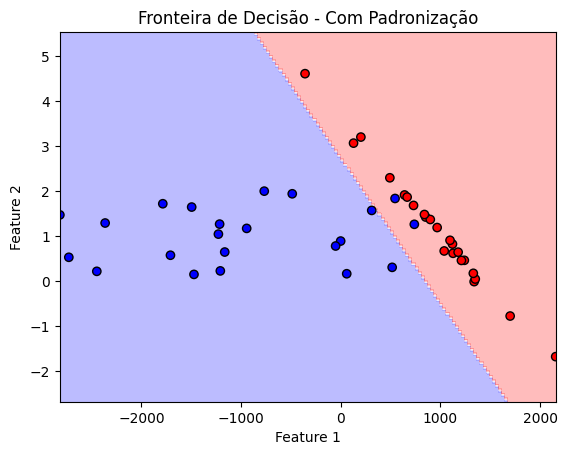

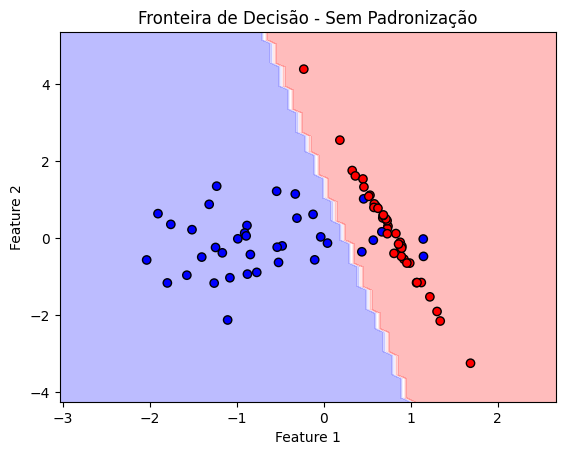

In [11]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Fronteira de decisão para os dados sem padronização
plot_decision_boundary(X_test, y_test, model, 'Fronteira de Decisão - Com Padronização')
print('\n')

# Fronteira de decisão para os dados com padronização
plot_decision_boundary(X_test_std, y_test_std, model_std, 'Fronteira de Decisão - Sem Padronização')


Comentários:

A padronização é essencial para muitos algoritmos de aprendizado de máquina. Para métodos como K-Nearest Neighbors (KNN) e Máquinas de Vetores de Suporte (SVM), que utilizam distâncias, a padronização garante que todas as características contribuam igualmente para o cálculo das distâncias, evitando distorções nas previsões. Além disso, algoritmos de otimização, como a regressão logística, convergem mais rapidamente com dados padronizados, já que as características têm escalas uniformes. Para modelos como a regressão logística, a padronização também facilita a interpretação dos coeficientes, permitindo comparações diretas entre variáveis.

Sem Padronização: A falta de padronização pode levar a uma fronteira de decisão distorcida e menos precisa, resultando em uma performance inferior do modelo.

Com Padronização: A padronização alinha a escala das variáveis, melhorando a acurácia e a consistência do modelo. A padronização é essencial para algoritmos que dependem da escala das variáveis, como regressão logística e k-NN.